In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/youtoxic_english_1000.csv")

df.head()


,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
# Dimensiones del dataset
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

df.info()

print("\nValores nulos por columna:")
print(df.isnull().sum())


Filas: 1000, Columnas: 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB

Valores nulos por columna:
CommentId          0
Vid

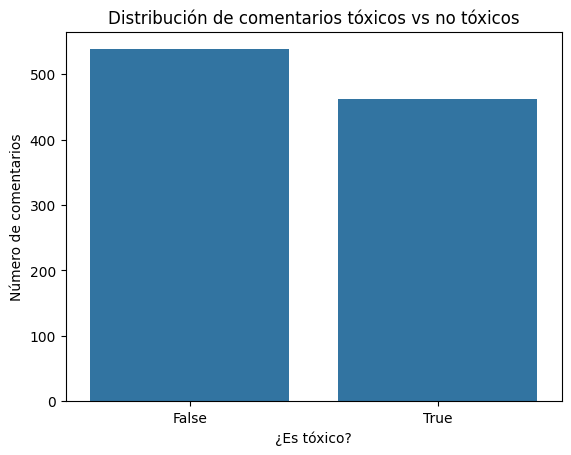

Distribución porcentual:
 IsToxic
False    53.8
True     46.2
Name: proportion, dtype: float64


In [10]:
# Distribución del target IsToxic
sns.countplot(x="IsToxic", data=df)
plt.title("Distribución de comentarios tóxicos vs no tóxicos")
plt.xlabel("¿Es tóxico?")
plt.ylabel("Número de comentarios")
plt.show()

# Porcentaje de cada clase
toxicity_ratio = df["IsToxic"].value_counts(normalize=True) * 100
print("Distribución porcentual:\n", toxicity_ratio)


In [11]:
# Crear columnas nuevas para análisis de texto
df["text_length_chars"] = df["Text"].apply(len)
df["text_length_words"] = df["Text"].apply(lambda x: len(x.split()))

# Mostrar estadísticos por tipo de comentario
df.groupby("IsToxic")[["text_length_chars", "text_length_words"]].describe()


text_length_chars                                                     \
                    count        mean         std  min    25%    50%     75%   
IsToxic                                                                        
False               538.0  182.262082  252.295702  3.0  44.00   96.0  210.75   
True                462.0  189.387446  291.061941  6.0  54.25  110.0  220.75   

                text_length_words                                         \
            max             count       mean        std  min   25%   50%   
IsToxic                                                                    
False    2292.0             538.0  33.065056  45.165137  1.0   8.0  18.0   
True     4421.0             462.0  34.603896  53.294876  1.0  10.0  20.0   

                      
          75%    max  
IsToxic               
False    38.0  418.0  
True     40.0  815.0

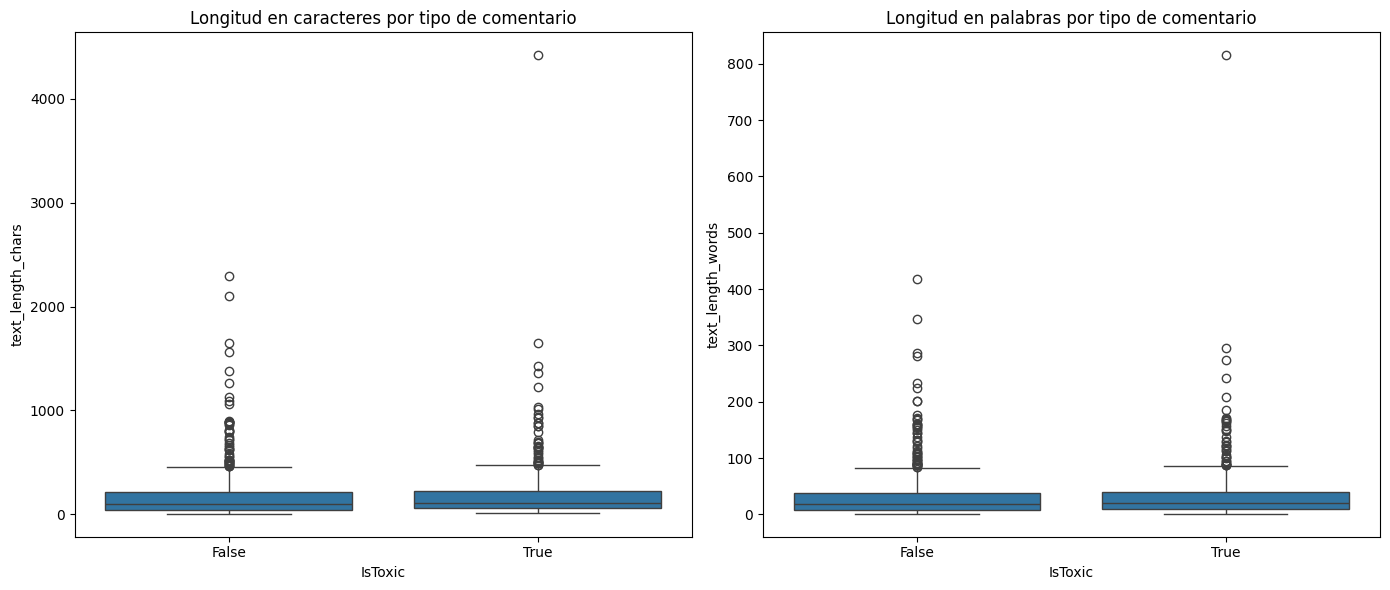

In [12]:
# Boxplots para comparar longitud de texto por clase
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x="IsToxic", y="text_length_chars", data=df, ax=axes[0])
axes[0].set_title("Longitud en caracteres por tipo de comentario")

sns.boxplot(x="IsToxic", y="text_length_words", data=df, ax=axes[1])
axes[1].set_title("Longitud en palabras por tipo de comentario")

plt.tight_layout()
plt.show()


### Comparativa de longitud de los comentarios (Boxplot)

En esta visualización comparamos la **longitud de los comentarios tóxicos y no tóxicos**, tanto en número de caracteres como de palabras.

#### ¿Qué es un boxplot?
Un **boxplot** (o diagrama de caja) es una representación visual que nos permite ver:
- La **mediana** del conjunto de datos (línea central de la caja).
- El **rango intercuartílico** (donde se concentra el 50% de los valores).
- Los **valores extremos o outliers** (representados como puntos).

#### ¿Qué vemos en estos gráficos?
- La longitud de los comentarios **tóxicos y no tóxicos** es muy similar.
- Hay **muchos comentarios cortos** en ambos grupos.
- Aparecen **algunos comentarios muy largos** (outliers), especialmente en caracteres.
- No se observa una diferencia clara que nos permita decir que un tipo de comentario sea más largo que otro de forma sistemática.

#### ¿Qué concluimos?
Aunque puede haber pequeñas diferencias, **la longitud del comentario no parece ser un buen indicador por sí solo de si un comentario es tóxico o no**. Aun así, es útil conocer estas características para posibles decisiones de preprocesamiento, como filtrar comentarios excesivamente largos o cortos.


In [13]:
# Filtrar comentarios tóxicos y no tóxicos
toxic_comments = df[df["IsToxic"] == True]["Text"]
nontoxic_comments = df[df["IsToxic"] == False]["Text"]

# Juntarlos en dos grandes textos para analizarlos
toxic_text = " ".join(toxic_comments).lower()
nontoxic_text = " ".join(nontoxic_comments).lower()


### Análisis del contenido textual

Para entender mejor las diferencias entre los comentarios tóxicos y no tóxicos, hemos separado los textos en dos grupos:

- Comentarios etiquetados como **tóxicos**.
- Comentarios etiquetados como **no tóxicos**.

Hemos unido los comentarios de cada grupo en un único texto para poder analizar qué palabras aparecen con mayor frecuencia en cada uno. Este enfoque nos permitirá visualizar patrones de lenguaje característicos, que luego pueden ser clave para entrenar un modelo predictivo.

En los próximos pasos generaremos:
- Listados de palabras más frecuentes.
- Nubes de palabras (*wordclouds*).
- N-gramas más comunes (combinaciones típicas de 2-3 palabras).
